In [1]:
import torch
import torchvision

# you can use torchvision instead of albumentations,
# but remember to convert to PIL.Image first
import albumentations
from albumentations.pytorch import ToTensorV2

import matplotlib.pyplot as plt
import os
import pandas as pd

import unitopatho

In [2]:
# Insert your path here!
path = '/data02/unitopath-public/800'

## Simple loading

In [3]:
T = albumentations.Compose([
    # Dont forget to normalize
    ToTensorV2()
])
transform = lambda x: T(image=x)['image']

In [4]:
df = pd.read_csv(os.path.join(path, 'test.csv'))
dataset = unitopatho.UTP(df, path=path, T=transform, subsample=-1, target='type')
dataloader = torch.utils.data.DataLoader(dataset, shuffle=True, batch_size=4, num_workers=2, pin_memory=True)

Loaded 2399 images


In [5]:
batch = next(iter(dataloader))

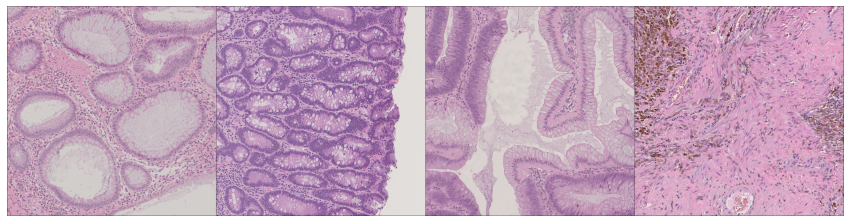

In [6]:
data, labels = batch
grid = torchvision.utils.make_grid(data)

plt.figure(figsize=(15, 5))
plt.axis('off')
plt.imshow(grid.permute(1, 2, 0))
plt.show()

Images are loaded at full-resolution. If you want a downsampled version, e.g. 224x224 use the *subsample=224* parameter instead of *albumentations.Resize* or *torchvision*. The folder *7000_224* provides images extracted at $\alpha=7000$ already downsampled to 224x224 for convenience.

## Speed-up loading

Full resolution images take a while to load. We suggest using a package such as [torchdata](https://github.com/szymonmaszke/torchdata) as it provides caching utilities.

## H&E preprocessing

If you are interested in H&E preprocessing such as stain normalization, check out [torchstain](https://github.com/EIDOSlab/torchstain)